## First we read the data just as told

In [286]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=150, resize=0.4)
X = lfw_people.data
Y = lfw_people.target
lfw_people.target_names

array(['Colin Powell', 'George W Bush'], dtype='<U13')

### Then we take a look the data 

In [287]:
lfw_people.images.shape

(766, 50, 37)

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (574, 1850)
x_test shape: (192, 1850)
y_train shape: (574,)
y_test shape: (192,)


### Let's see some examples of our dataset: 

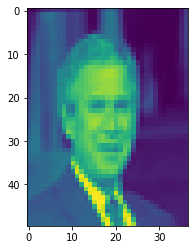

In [288]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(50, 37))

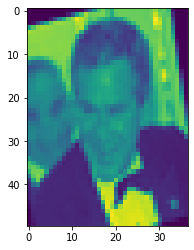

In [289]:
plt.imshow(x_test[0].reshape(50, 37))

### The actual data looks like:

In [290]:
x_train

array([[0.01699346, 0.0248366 , 0.05751634, ..., 0.1267974 , 0.09281046,
        0.08627451],
       [0.00130719, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.0130719 , ..., 0.00915033, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.075817  , 0.075817  ,
        0.07189543],
       [0.3934641 , 0.4993464 , 0.5751634 , ..., 0.10849673, 0.15816994,
        0.23006536],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

#### For a better result; first we normalize the data:

##### Pay attention that we first fit over x_train then transform over x_train and x_test

In [257]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

### Here we define a function that does ALL the stuff we need!!!
#### It gets pca_n_components as the argument and feed it to PCA. Then use it to reduce the number of features. Prints some info. then fit the model over train and test and prints the results and scores. It also plots confusion matrices.

In [258]:
from sklearn.decomposition import PCA
def DoATest(pca_n_components, model):
    global x_train, x_test, y_train, y_test
    pca = PCA(n_components=pca_n_components).fit(x_train)
    pca_applied_x_train = pca.transform(x_train)
    pca_applied_x_test = pca.transform(x_test)
    print("Applied PCA:")
    print(f"x_train shape: {pca_applied_x_train.shape}")
    print(f"x_test shape: {pca_applied_x_test.shape}")

    model.fit(pca_applied_x_train, y_train)
    print("TESTING OVER TRAIN PART OF DATA:")
    print("RESULTS OVER Y_TRAIN:")
    report_results(model.predict(pca_applied_x_train), y_train)
    plt.show()
    
    print("TESTING OVER TEST PART OF DATA:")
    print("REULTS OVER Y_TEST:")
    report_results(model.predict(pca_applied_x_test), y_test)
    plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns

def report_results(y_predicted, y_true, figure_ax=None):
    print(f"accuracy: {accuracy_score(y_true, y_predicted)}")
    print(classification_report(y_true, y_predicted))
    mat = confusion_matrix(y_true, y_predicted)
    sns.heatmap(mat, annot=True, ax=figure_ax)
    



### Now all we need to do is to play with the parameters and just call the function we mentioned earlier to find the best parameter set!

Applied PCA:
x_train shape: (574, 200)
x_test shape: (192, 200)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



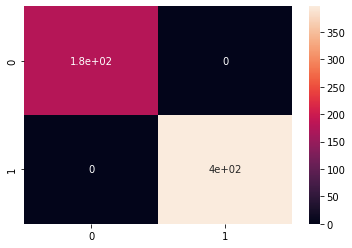

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.953125
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.96      0.97      0.97       133

    accuracy                           0.95       192
   macro avg       0.95      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192



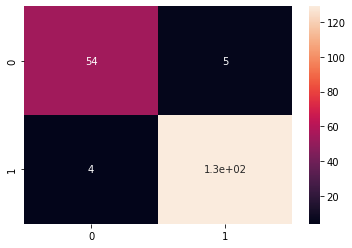

In [271]:
from sklearn.neural_network import MLPClassifier as MLP
DoATest(200, MLP())

Applied PCA:
x_train shape: (574, 150)
x_test shape: (192, 150)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



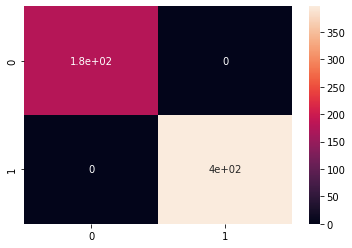

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.953125
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.96      0.97      0.97       133

    accuracy                           0.95       192
   macro avg       0.95      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192



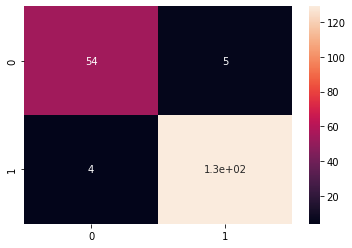

In [270]:
DoATest(150, MLP())

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



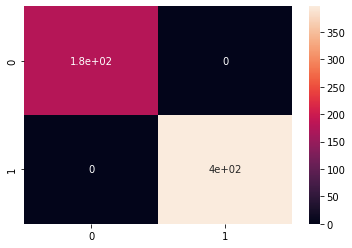

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.95      0.96      0.96       133

    accuracy                           0.94       192
   macro avg       0.93      0.92      0.93       192
weighted avg       0.94      0.94      0.94       192



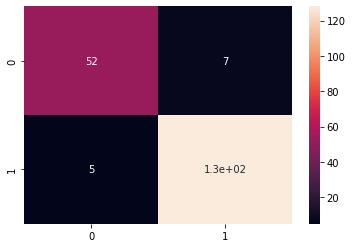

In [272]:
DoATest(100, MLP())

Applied PCA:
x_train shape: (574, 80)
x_test shape: (192, 80)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



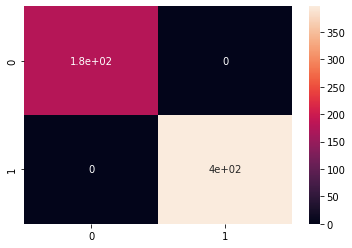

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9322916666666666
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        59
           1       0.94      0.96      0.95       133

    accuracy                           0.93       192
   macro avg       0.93      0.91      0.92       192
weighted avg       0.93      0.93      0.93       192



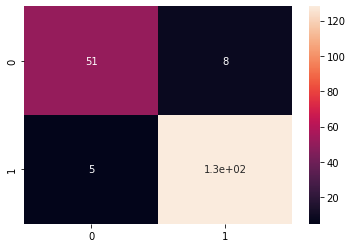

In [273]:
DoATest(80, MLP())

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



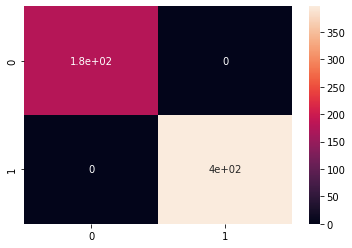

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9427083333333334
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        59
           1       0.94      0.98      0.96       133

    accuracy                           0.94       192
   macro avg       0.94      0.92      0.93       192
weighted avg       0.94      0.94      0.94       192



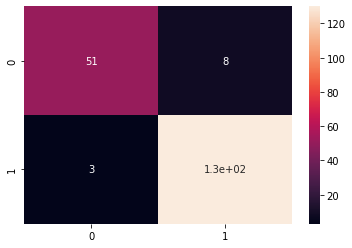

In [274]:
DoATest(100, MLP(max_iter=500))

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



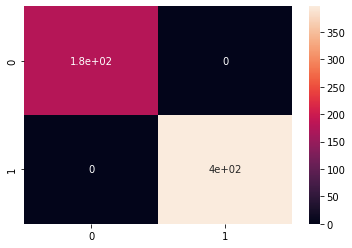

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.95      0.96      0.96       133

    accuracy                           0.94       192
   macro avg       0.93      0.92      0.93       192
weighted avg       0.94      0.94      0.94       192



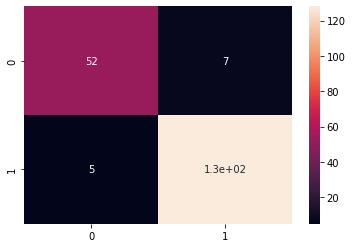

In [275]:
DoATest(100, MLP(max_iter=500, hidden_layer_sizes=(150,)))

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       397

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



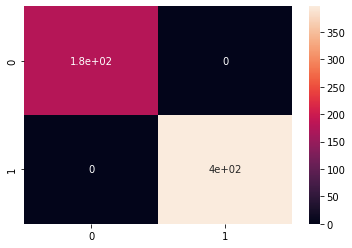

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.96      0.96      0.96       133

    accuracy                           0.95       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192



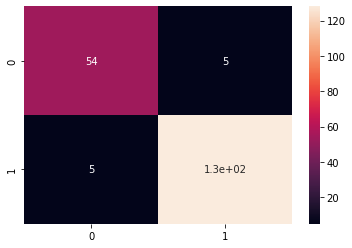

In [276]:
DoATest(100, MLP(max_iter=500, hidden_layer_sizes=(150,), activation="logistic"))

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 0.9895470383275261
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       177
           1       0.99      1.00      0.99       397

    accuracy                           0.99       574
   macro avg       0.99      0.98      0.99       574
weighted avg       0.99      0.99      0.99       574



/home/pedram/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


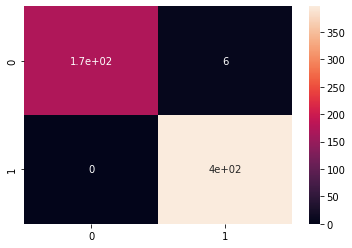

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.96      0.98      0.97       133

    accuracy                           0.96       192
   macro avg       0.96      0.95      0.95       192
weighted avg       0.96      0.96      0.96       192



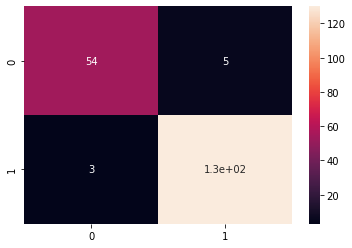

In [277]:
DoATest(100, MLP(max_iter=500, hidden_layer_sizes=(150,), activation="logistic", solver="sgd"))

Applied PCA:
x_train shape: (574, 100)
x_test shape: (192, 100)
TESTING OVER TRAIN PART OF DATA:
RESULTS OVER Y_TRAIN:
accuracy: 0.9947735191637631
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       177
           1       0.99      1.00      1.00       397

    accuracy                           0.99       574
   macro avg       1.00      0.99      0.99       574
weighted avg       0.99      0.99      0.99       574



/home/pedram/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


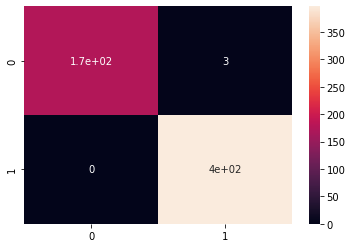

TESTING OVER TEST PART OF DATA:
REULTS OVER Y_TEST:
accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.97      0.98      0.98       133

    accuracy                           0.97       192
   macro avg       0.97      0.96      0.96       192
weighted avg       0.97      0.97      0.97       192



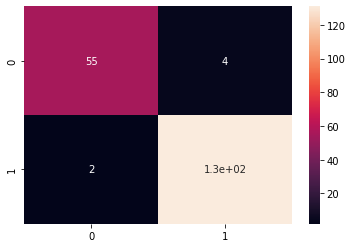

In [267]:
DoATest(100, MLP(max_iter=700, hidden_layer_sizes=(150,), activation="logistic", solver="sgd"))


# Perfect!

##### The last one is the best indeed! Because at the same time that has a good accuracy(96.87%) on the test data, it has very close accuracy on the train(99.4) which shows us that the model is accurate and ALSO it hasn't overfit! because the accuracy over train and test are pretty close!
###### (The earlier tries that the accuracy over train were 100% and accuracy over test was much different the model had overfit)